In [3]:
import pandas as pd
df = pd.read_csv("/Users/sarahasad/Downloads/diabetes.csv")

In [4]:
df.head()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

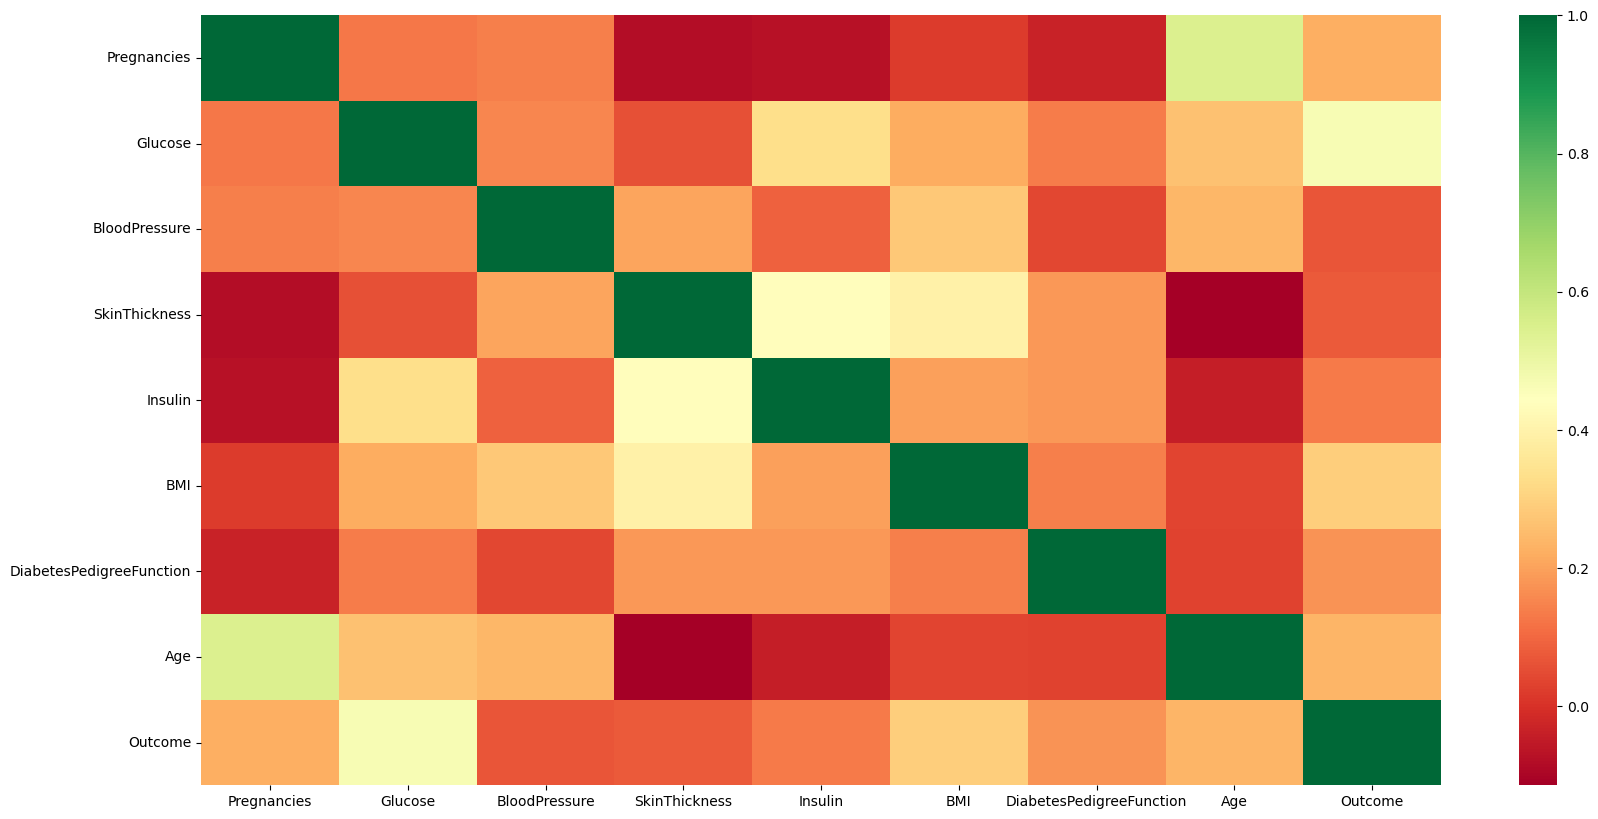

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=False, cmap="RdYlGn")

In [6]:
features = []
for col in df.columns:
    if col != 'Outcome':
        features.append(col)

target = 'Outcome'

X = df[features]
Y = df[target] #Outcome is the target variable

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state = 1)

In [9]:
#Model 1: Logistic Regression
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train, Y_train)

LogisticRegression()

In [10]:
Y_pred = lgr.predict(X_test)

In [11]:
#Syntax: Accuracy score(Actual X_test value, actual y_test value)
#Score takes X_test and finds its y_pred and then compares it with y_test all on its own thus we dont add y_test in place of X_test
from sklearn.metrics import accuracy_score
score = lgr.score(X_test, Y_test)
print(score*100)

77.60416666666666


In [12]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[109  14]
 [ 29  40]]


In [13]:
#Classification report
from sklearn.metrics import classification_report
#Syntax: classification_report(actual_value, predicted_value))
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



In [14]:
#Model 2: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train,Y_train)

RandomForestClassifier(random_state=1)

In [15]:
Y_pred = rfc.predict(X_test)

#Accuracy score
from sklearn.metrics import accuracy_score
score = rfc.score(X_test, Y_test)
print(score*100)

#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

80.20833333333334
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       123
           1       0.76      0.65      0.70        69

    accuracy                           0.80       192
   macro avg       0.79      0.77      0.78       192
weighted avg       0.80      0.80      0.80       192



In [16]:
#Model 3: Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [17]:
Y_pred = dtc.predict(X_test)

#Accuracy score
score = dtc.score(X_test, Y_test)
print(score*100)

#Classification report based on confusion matrix
print(classification_report(Y_test, Y_pred))

71.875
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       123
           1       0.62      0.57      0.59        69

    accuracy                           0.72       192
   macro avg       0.69      0.69      0.69       192
weighted avg       0.71      0.72      0.72       192



In [27]:
#Model 4: Gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [28]:
Y_pred = gnb.predict(X_test)

#Accuracy Score
score = gnb.score(X_test, Y_test)
print(score*100)

#Classification report
print(classification_report(Y_test, Y_pred))

79.16666666666666
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       123
           1       0.73      0.67      0.70        69

    accuracy                           0.79       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.79      0.79      0.79       192



In [31]:
#Model 5: KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [32]:
Y_pred = knn.predict(X_test)

#Accuracy Score
score = knn.score(X_test, Y_test)
print(score*100)

#Classification report
print(classification_report(Y_test, Y_pred))

79.6875
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       123
           1       0.76      0.64      0.69        69

    accuracy                           0.80       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.79      0.80      0.79       192



In [22]:
#Score comparison
1. Logistic Regression: 77.60
2. Random Forest Classifier: 80.20
3. Decision Tree Classifier: 71.87
4. Gaussian NB: 79.16
5. KNeighbors Classifier: 79.68

SyntaxError: invalid syntax (1089524282.py, line 2)